In [ ]:
import datetime

import matplotlib.pyplot as plt
import seaborn as sbn

import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

In [ ]:
oil_futures_path = './crude_oil_futures.csv'
gasoline_path = './gasoline.csv'

oil_futures = pd.read_csv(oil_futures_path)
gasoline = pd.read_csv(gasoline_path)

In [ ]:
oil_futures.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 17, 2021",52.27,52.00,53.79,51.44,516.20K,-0.17%
1,"Jan 10, 2021",52.36,52.58,53.93,51.50,1.62M,0.23%
2,"Jan 03, 2021",52.24,48.40,52.75,47.18,2.05M,7.67%
3,"Dec 27, 2020",48.52,48.23,48.96,47.50,901.09K,0.60%
4,"Dec 20, 2020",48.23,48.54,48.62,46.16,835.39K,-1.77%


In [ ]:
oil_futures.tail()

,Date,Price,Open,High,Low,Vol.,Change %
1094,"Jan 30, 2000",28.82,27.10,28.87,26.70,400.57K,5.88%
1095,"Jan 23, 2000",27.22,28.23,28.77,26.95,335.79K,-3.48%
1096,"Jan 16, 2000",28.20,28.03,29.95,27.70,283.87K,0.64%
1097,"Jan 09, 2000",28.02,24.22,28.10,24.02,428.17K,15.69%
1098,"Jan 02, 2000",24.22,25.20,25.69,24.15,322.81K,-5.39%


In [ ]:
gasoline.head()

,Date,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
0,"Aug 20, 1990",1.191
1,"Aug 27, 1990",1.245
2,"Sep 03, 1990",1.242
3,"Sep 10, 1990",1.252
4,"Sep 17, 1990",1.266


In [ ]:
gasoline.tail()

,Date,Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)
1583,"Dec 21, 2020",2.224
1584,"Dec 28, 2020",2.243
1585,"Jan 04, 2021",2.249
1586,"Jan 11, 2021",2.317
1587,"Jan 18, 2021",2.379


In [ ]:
gasoline_start_index = gasoline[gasoline['Date'] == 'Jan 03, 2000'].index.values[0]
gasoline_start_index

489

In [ ]:
gas_df = gasoline[gasoline_start_index:]
len(gas_df)

1099

In [ ]:
len(oil_futures)

1099

In [ ]:
df_date = gas_df['Date'].reset_index(drop=True)
df_date

0       Jan 03, 2000
1       Jan 10, 2000
2       Jan 17, 2000
3       Jan 24, 2000
4       Jan 31, 2000
            ...     
1094    Dec 21, 2020
1095    Dec 28, 2020
1096    Jan 04, 2021
1097    Jan 11, 2021
1098    Jan 18, 2021
Name: Date, Length: 1099, dtype: object

In [ ]:
df_oil_futures = oil_futures['Price'][::-1].reset_index(drop=True)
df_oil_futures

0       24.22
1       28.02
2       28.20
3       27.22
4       28.82
        ...  
1094    48.23
1095    48.52
1096    52.24
1097    52.36
1098    52.27
Name: Price, Length: 1099, dtype: float64

In [ ]:
df_gas = gas_df['Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon)'].reset_index(drop=True)
df_gas

0       1.272
1       1.264
2       1.277
3       1.315
4       1.316
        ...  
1094    2.224
1095    2.243
1096    2.249
1097    2.317
1098    2.379
Name: Weekly U.S. Regular All Formulations Retail Gasoline Prices  (Dollars per Gallon), Length: 1099, dtype: float64

In [ ]:
df = pd.DataFrame({ 'Week': df_date, 'oil_futures': df_oil_futures, 'gasoline': df_gas })
df

,Week,oil_futures,gasoline
0,"Jan 03, 2000",24.22,1.272
1,"Jan 10, 2000",28.02,1.264
2,"Jan 17, 2000",28.20,1.277
3,"Jan 24, 2000",27.22,1.315
4,"Jan 31, 2000",28.82,1.316
...,...,...,...
1094,"Dec 21, 2020",48.23,2.224
1095,"Dec 28, 2020",48.52,2.243
1096,"Jan 04, 2021",52.24,2.249
1097,"Jan 11, 2021",52.36,2.317


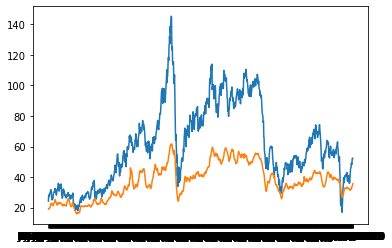

In [ ]:
plt.plot(df['Week'], df['oil_futures'])
plt.plot(df['Week'], df['gasoline'] * 15)
plt.show()

In [ ]:
periods = (1, 2, 3, 5, 10)

for p in periods:
  df['of_chg_{}'.format(p)] = df['oil_futures'].pct_change(periods=p)

df['gas_chg_1'] = df['gasoline'].pct_change()

df = df[11:]  # The first 10 rows contains NaN
df

,Week,oil_futures,gasoline,of_chg_1,of_chg_2,of_chg_3,of_chg_5,of_chg_10,gas_chg_1
11,"Mar 20, 2000",28.02,1.529,-0.093497,-0.117758,-0.110758,-0.050491,0.000000,0.001310
12,"Mar 27, 2000",26.90,1.508,-0.039971,-0.129731,-0.153023,-0.113674,-0.046099,-0.013734
13,"Apr 03, 2000",25.04,1.503,-0.069145,-0.106353,-0.189906,-0.205332,-0.080088,-0.003316
14,"Apr 10, 2000",25.57,1.475,0.021166,-0.049442,-0.087438,-0.194899,-0.112769,-0.018629
15,"Apr 17, 2000",25.88,1.444,0.012124,0.033546,-0.037918,-0.162731,-0.120924,-0.021017
...,...,...,...,...,...,...,...,...,...
1094,"Dec 21, 2020",48.23,2.224,-0.017719,0.035645,0.042585,0.144247,0.179795,0.030584
1095,"Dec 28, 2020",48.52,2.243,0.006013,-0.011813,0.041872,0.065671,0.217566,0.008543
1096,"Jan 04, 2021",52.24,2.249,0.076669,0.083143,0.063951,0.129269,0.459626,0.002675
1097,"Jan 11, 2021",52.36,2.317,0.002297,0.079143,0.085631,0.124329,0.409801,0.030236


In [ ]:
chgs = ['of_chg_{}'.format(i) for i in periods]
X = df[['oil_futures'] + chgs].values
X

array([[ 2.80200000e+01, -9.34972501e-02, -1.17758186e-01,
        -1.10758489e-01, -5.04913589e-02,  0.00000000e+00],
       [ 2.69000000e+01, -3.99714490e-02, -1.29731478e-01,
        -1.53022670e-01, -1.13673806e-01, -4.60992908e-02],
       [ 2.50400000e+01, -6.91449814e-02, -1.06352605e-01,
        -1.89906179e-01, -2.05331641e-01, -8.00881705e-02],
       ...,
       [ 5.22400000e+01,  7.66694147e-02,  8.31432718e-02,
         6.39511202e-02,  1.29269347e-01,  4.59625594e-01],
       [ 5.23600000e+01,  2.29709035e-03,  7.91426216e-02,
         8.56313498e-02,  1.24328967e-01,  4.09800754e-01],
       [ 5.22700000e+01, -1.71886937e-03,  5.74272588e-04,
         7.72877164e-02,  6.45621181e-02,  3.02516820e-01]])

In [ ]:
y = (df['gas_chg_1'] > 0).values.astype('int')
y

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
X.shape

(1088, 6)

In [ ]:
y.shape

(1088,)

In [ ]:
########

# Create training, validation, and test set

training_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, \
  test_size=validation_ratio/(training_ratio+validation_ratio), random_state=42)

print("X_train shape:\t", X_train.shape)
print("X_test shape:\t", X_test.shape)
print("X_val shape:\t", X_val.shape)
print("y_train shape:\t", y_train.shape)
print("y_val shape:\t", y_val.shape)
print("y_test shape:\t", y_test.shape)

X_train shape:	 (760, 6)
X_test shape:	 (164, 6)
X_val shape:	 (164, 6)
y_train shape:	 (760,)
y_val shape:	 (164,)
y_test shape:	 (164,)


In [ ]:
X_train[:5,:]

array([[ 2.69100000e+01, -2.39400791e-01, -2.87718370e-01,
        -2.64754098e-01, -2.68750000e-01, -1.50568182e-01],
       [ 6.01400000e+01,  1.86314363e-02,  2.76828435e-02,
         7.25878366e-02,  5.02968914e-02,  1.17843866e-01],
       [ 7.25100000e+01,  1.92578015e-02, -2.47478144e-02,
        -3.00963082e-02, -2.57960500e-02,  3.76359473e-02],
       [ 6.95500000e+01, -3.45641310e-02,  1.62185856e-02,
         4.88614085e-02,  2.34469294e-01,  3.31355283e-01],
       [ 5.38000000e+01,  4.28377593e-02,  1.21768140e-01,
         1.86851974e-01,  5.07812500e-02, -1.06163815e-01]])

In [ ]:
X_test[:5,:]

array([[ 5.29900000e+01, -5.89593323e-02, -1.32022932e-01,
        -1.50937350e-01, -1.45735934e-01, -1.03990531e-01],
       [ 2.72800000e+01, -3.43362832e-02,  8.13008130e-03,
         3.76569038e-02,  2.01944652e-02, -1.20850790e-01],
       [ 6.16700000e+01,  9.46041889e-02,  5.18505884e-02,
         1.59210526e-01,  2.25312935e-01,  3.33405405e-01],
       [ 1.07650000e+02,  1.15579778e-02,  1.76809976e-03,
         1.58535435e-02,  2.81757402e-02,  1.49002028e-01],
       [ 9.98800000e+01,  2.45153349e-02,  3.35264901e-02,
         5.83871993e-02,  6.30055343e-02,  7.72217429e-02]])

In [ ]:
# The first column of X is 'oil_futures'
# Normalize all columns for training and test set
# Note: Test set should use the mean and std of training set to keep consistent
for i in range(X_train.shape[1]):
  X_train_of_mean = X_train[:,i].mean()
  X_train_of_std = X_train[:,i].std()

  #### VALIDATION SET NORMALIZE
  
  X_train[:,i] = (X_train[:,i] - X_train_of_mean) / X_train_of_std
  X_test[:,i] = (X_test[:,i] - X_train_of_mean) / X_train_of_std

In [ ]:
X_train

array([[-1.34998705, -4.40716494, -3.71631597, -2.87382397, -2.22473558,
        -0.97949769],
       [-0.04610926,  0.27636994,  0.2657335 ,  0.64796948,  0.25708184,
         0.47708589],
       [ 0.43926444,  0.28773908, -0.3962217 , -0.42403584, -0.33483362,
         0.04182399],
       ...,
       [-0.3490264 , -0.04447913, -0.45091021, -0.3624747 , -0.05623169,
         0.96392328],
       [-1.16713811, -0.21572707,  0.12766699, -0.30773156,  0.22679739,
        -0.03035669],
       [ 0.07788273, -0.2603349 , -0.20036228, -0.07342509,  0.42710864,
         0.59023273]])

In [ ]:
X_test

array([[-3.26660759e-01, -1.13197767e+00, -1.75060719e+00,
        -1.68559613e+00, -1.26782781e+00, -7.26736156e-01],
       [-1.33546900e+00, -6.85045476e-01,  1.88731128e-02,
         2.83296375e-01,  2.29196250e-02, -8.18231213e-01],
       [ 1.39248333e-02,  1.65534899e+00,  5.70859647e-01,
         1.55229589e+00,  1.61850511e+00,  1.64686720e+00],
       [ 1.81808676e+00,  1.47979818e-01, -6.14491061e-02,
         5.56729355e-02,  8.50047536e-02,  6.46170945e-01],
       [ 1.51320772e+00,  3.83168400e-01,  3.39511563e-01,
         4.99717197e-01,  3.55940443e-01,  2.56643034e-01],
       [-1.69842024e+00, -3.48451609e+00, -1.42889062e+00,
        -2.00540199e+00, -1.67956795e+00, -2.09843595e+00],
       [ 1.89318566e-01,  7.31598034e-01,  2.77513199e-01,
         6.88784624e-01,  8.86246695e-01,  7.57864893e-01],
       [ 1.15339552e+00, -3.37515307e-02, -3.53468658e-01,
        -8.77548588e-01, -3.50920740e-01, -4.12919454e-01],
       [ 1.73623377e-01, -8.11152826e-02, -4.818

In [ ]:
res = dict()
score = dict()

### SVC

# Try different kernels
kernels = ('linear', 'poly', 'rbf')

for k in kernels:
  svm_clf = SVC(kernel=k).fit(X_train, y_train)
  y_pred = svm_clf.predict(X_test)
  score_svc = accuracy_score(y_test, y_pred)
  print(f"kernel={k},\tscore={score_svc:.4f}")

  score[f'svc_{k}'] = score_svc

kernel=linear,	score=0.7500
kernel=poly,	score=0.7195
kernel=rbf,	score=0.7012


In [ ]:
# Gaussian Naive Bayes
gnb_clf = GaussianNB().fit(X_train, y_train)
y_pred = gnb_clf.predict(X_test)
score_gnb = accuracy_score(y_test, y_pred)
print(f"GNB, score={score_gnb:.4f}")

score['gnb'] = score_gnb

GNB, score=0.6646


In [ ]:
### Neuro Networks

model = keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=6, activation='relu'))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
24/24 [==============================] - 1s 10ms/step - loss: 0.8143 - accuracy: 0.4790 - val_loss: 8.0115 - val_accuracy: 0.4268
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.7679 - accuracy: 0.4851 - val_loss: 8.2717 - val_accuracy: 0.4268
Epoch 3/50
24/24 [==============================] - 0s 11ms/step - loss: 0.7286 - accuracy: 0.4773 - val_loss: 8.5753 - val_accuracy: 0.4268
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.5140 - val_loss: 9.1146 - val_accuracy: 0.4268
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.5220 - val_loss: 9.5860 - val_accuracy: 0.4268
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.5551 - val_loss: 9.7890 - val_accuracy: 0.4268
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6092 - val_loss: 10.2064 - val_accuracy: 0.4268
Epoch 8/50
24/24 

In [ ]:
loss, score_neuro = model.evaluate(X_test, y_test)

score['neuro'] = score_neuro
res[0] = score

6/6 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.7317


In [ ]:
### Modify LAGS

lags = [i for i in range(1, 6)]

for lag in lags:
  gas_chg_1_lag = df['gas_chg_1'][lag:].values.tolist()
  gas_chg_1_lag.extend([np.nan for _ in range(lag)])
  gas_chg_1_lag = np.array(gas_chg_1_lag)
  df[f'gas_chg_1_lag_{lag}'] = gas_chg_1_lag

df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Week,oil_futures,gasoline,of_chg_1,of_chg_2,of_chg_3,of_chg_5,of_chg_10,gas_chg_1,gas_chg_1_lag_1,gas_chg_1_lag_2,gas_chg_1_lag_3,gas_chg_1_lag_4,gas_chg_1_lag_5
11,"Mar 20, 2000",28.02,1.529,-0.093497,-0.117758,-0.110758,-0.050491,0.000000,0.001310,-0.013734,-0.003316,-0.018629,-0.021017,-0.004848
12,"Mar 27, 2000",26.90,1.508,-0.039971,-0.129731,-0.153023,-0.113674,-0.046099,-0.013734,-0.003316,-0.018629,-0.021017,-0.004848,-0.011830
13,"Apr 03, 2000",25.04,1.503,-0.069145,-0.106353,-0.189906,-0.205332,-0.080088,-0.003316,-0.018629,-0.021017,-0.004848,-0.011830,0.024648
14,"Apr 10, 2000",25.57,1.475,0.021166,-0.049442,-0.087438,-0.194899,-0.112769,-0.018629,-0.021017,-0.004848,-0.011830,0.024648,0.025430
15,"Apr 17, 2000",25.88,1.444,0.012124,0.033546,-0.037918,-0.162731,-0.120924,-0.021017,-0.004848,-0.011830,0.024648,0.025430,0.023458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,"Dec 21, 2020",48.23,2.224,-0.017719,0.035645,0.042585,0.144247,0.179795,0.030584,0.008543,0.002675,0.030236,0.026759,NaN
1095,"Dec 28, 2020",48.52,2.243,0.006013,-0.011813,0.041872,0.065671,0.217566,0.008543,0.002675,0.030236,0.026759,NaN,NaN
1096,"Jan 04, 2021",52.24,2.249,0.076669,0.083143,0.063951,0.129269,0.459626,0.002675,0.030236,0.026759,NaN,NaN,NaN
1097,"Jan 11, 2021",52.36,2.317,0.002297,0.079143,0.085631,0.124329,0.409801,0.030236,0.026759,NaN,NaN,NaN,NaN


In [ ]:
df.tail(10)

,Week,oil_futures,gasoline,of_chg_1,of_chg_2,of_chg_3,of_chg_5,of_chg_10,gas_chg_1,gas_chg_1_lag_1,gas_chg_1_lag_2,gas_chg_1_lag_3,gas_chg_1_lag_4,gas_chg_1_lag_5
1089,"Nov 16, 2020",42.15,2.111,0.050336,0.134895,0.177703,0.031067,0.129119,0.007156,-0.004263,0.008563,0.016981,0.000928,0.030584
1090,"Nov 23, 2020",45.53,2.102,0.080190,0.134563,0.225902,0.142535,0.107516,-0.004263,0.008563,0.016981,0.000928,0.030584,0.008543
1091,"Nov 30, 2020",46.26,2.120,0.016033,0.097509,0.152754,0.292540,0.149317,0.008563,0.016981,0.000928,0.030584,0.008543,0.002675
1092,"Dec 07, 2020",46.57,2.156,0.006701,0.022842,0.104864,0.253904,0.256950,0.016981,0.000928,0.030584,0.008543,0.002675,0.030236
1093,"Dec 14, 2020",49.10,2.158,0.054327,0.061392,0.078410,0.223524,0.209360,0.000928,0.030584,0.008543,0.002675,0.030236,0.026759
1094,"Dec 21, 2020",48.23,2.224,-0.017719,0.035645,0.042585,0.144247,0.179795,0.030584,0.008543,0.002675,0.030236,0.026759,NaN
1095,"Dec 28, 2020",48.52,2.243,0.006013,-0.011813,0.041872,0.065671,0.217566,0.008543,0.002675,0.030236,0.026759,NaN,NaN
1096,"Jan 04, 2021",52.24,2.249,0.076669,0.083143,0.063951,0.129269,0.459626,0.002675,0.030236,0.026759,NaN,NaN,NaN
1097,"Jan 11, 2021",52.36,2.317,0.002297,0.079143,0.085631,0.124329,0.409801,0.030236,0.026759,NaN,NaN,NaN,NaN
1098,"Jan 18, 2021",52.27,2.379,-0.001719,0.000574,0.077288,0.064562,0.302517,0.026759,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Try different models

# res = { 1: dict(...), 2: dict(...) }
# dict(...) = { 'svm': 0.72.., 'gnb': ... }

for lag in lags:
  print(f"{'>'*20} LAG = {lag} {'<'*20}")
  print()

  # Remove the last few rows that contain NaN
  df_filtered = df[:-lag]
  score = dict()

  # Create X and y
  chgs = ['of_chg_{}'.format(i) for i in periods]
  X = df[['oil_futures'] + chgs].values
  y = (df[f'gas_chg_1_lag_{lag}'] > 0).values.astype('int')

  training_ratio = 0.7
  validation_ratio = 0.15
  test_ratio = 0.15

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, \
    test_size=validation_ratio/(training_ratio+validation_ratio), random_state=42)

  # Normalize
  for i in range(X_train.shape[1]):
    X_train_of_mean = X_train[:,i].mean()
    X_train_of_std = X_train[:,i].std()
    
    X_train[:,i] = (X_train[:,i] - X_train_of_mean) / X_train_of_std
    X_test[:,i] = (X_test[:,i] - X_train_of_mean) / X_train_of_std

  # SVC
  kernels = ['linear', 'poly', 'rbf']

  for k in kernels:
    svm_clf = SVC(kernel=k).fit(X_train, y_train)
    y_pred = svm_clf.predict(X_test)
    score_svc = accuracy_score(y_test, y_pred)
    
    # Store the result
    score[f'svc_{k}'] = score_svc

  # Gaussian Naive Bayes
  gnb_clf = GaussianNB().fit(X_train, y_train)
  y_pred = gnb_clf.predict(X_test)
  score_gnb = accuracy_score(y_test, y_pred)

  # Store the result
  score['gnb'] = score_gnb

  ### Neuro Networks

  model = keras.models.Sequential()
  model.add(keras.layers.Dense(10, input_dim=6, activation='relu'))
  model.add(keras.layers.Dense(5, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
  loss, score_neuro = model.evaluate(X_test, y_test)

  # Store the result
  score['neuro'] = score_neuro

  res[lag] = score

>>>>>>>>>>>>>>>>>>>> LAG = 1 <<<<<<<<<<<<<<<<<<<<

Epoch 1/50
24/24 [==============================] - 1s 9ms/step - loss: 0.7029 - accuracy: 0.4618 - val_loss: 1.3036 - val_accuracy: 0.5610
Epoch 2/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6798 - accuracy: 0.6050 - val_loss: 1.6581 - val_accuracy: 0.5610
Epoch 3/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6656 - accuracy: 0.6502 - val_loss: 2.1144 - val_accuracy: 0.5610
Epoch 4/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6598 - accuracy: 0.6546 - val_loss: 2.6071 - val_accuracy: 0.5610
Epoch 5/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6301 - accuracy: 0.6937 - val_loss: 3.1666 - val_accuracy: 0.5610
Epoch 6/50
24/24 [==============================] - 0s 3ms/step - loss: 0.6152 - accuracy: 0.7018 - val_loss: 3.6635 - val_accuracy: 0.5610
Epoch 7/50
24/24 [==============================] - 0s 3ms/step - loss: 0.5972 - accuracy: 0.6959 - val_loss:

In [ ]:
# Clean up the data
import heapq
ranking = []

for lag, dct in res.items():
  for m, s in dct.items():
    heapq.heappush(ranking, (-s, lag, m))

print("Accuracy ranking: (Descending)")
for r in ranking:
  s, l, m = r
  print(f"\tscore={-s:.6f}, lag={l}, model={m}")

Accuracy ranking: (Descending)
	score=0.798780, lag=1, model=svc_linear
	score=0.780488, lag=1, model=svc_rbf
	score=0.774390, lag=1, model=svc_poly
	score=0.768293, lag=1, model=gnb
	score=0.774390, lag=1, model=neuro
	score=0.762195, lag=2, model=svc_poly
	score=0.750000, lag=0, model=svc_linear
	score=0.664634, lag=0, model=gnb
	score=0.731707, lag=0, model=neuro
	score=0.719512, lag=0, model=svc_poly
	score=0.762195, lag=2, model=svc_linear
	score=0.701220, lag=0, model=svc_rbf
	score=0.719512, lag=2, model=svc_rbf
	score=0.743902, lag=2, model=gnb
	score=0.750000, lag=2, model=neuro
	score=0.658537, lag=3, model=svc_linear
	score=0.597561, lag=3, model=svc_poly
	score=0.634146, lag=3, model=svc_rbf
	score=0.658537, lag=3, model=gnb
	score=0.634146, lag=3, model=neuro
	score=0.554878, lag=4, model=svc_linear
	score=0.487805, lag=4, model=svc_poly
	score=0.579268, lag=4, model=svc_rbf
	score=0.548780, lag=4, model=gnb
	score=0.554878, lag=4, model=neuro
	score=0.530488, lag=5, model

In [ ]:
lag_dct = dict()
for s, l, m in ranking:
  if m not in lag_dct:
    lag_dct[m] = (l, -s)
    continue
  l_cur, s_cur = lag_dct[m]
  if s_cur < -s:
    lag_dct[m] = (l, -s)

lag_dct  # As you can see, for any model, lag=1 produces the best result

{'gnb': (1, 0.7682926829268293),
 'neuro': (1, 0.7743902206420898),
 'svc_linear': (1, 0.7987804878048781),
 'svc_poly': (1, 0.774390243902439),
 'svc_rbf': (1, 0.7804878048780488)}